# Fake News Classifier

Dataset: https://www.kaggle.com/c/fake-news/data#

## Importing the dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fake-news/train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
# Get the independent features
X = df.drop('label', axis=1)

In [5]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
#Getting the dependent features
y = df['label']

In [7]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
df.shape

(20800, 5)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer

In [10]:
df = df.dropna()

In [11]:
df.shape

(18285, 5)

In [12]:
messages=df.copy()

In [13]:
messages.reset_index(inplace=True)

In [15]:
messages['text'][6]

'PARIS  —   France chose an idealistic, traditional   candidate in Sunday’s primary to represent the Socialist and   parties in the presidential election this spring. The candidate, Benoît Hamon, 49, who ran on the slogan that he would “make France’s heart beat,” bested Manuel Valls, the former prime minister, whose campaign has promoted more   policies and who has a strong    background. Mr. Hamon appeared to have won by a wide margin, with incomplete returns showing him with an estimated 58 percent of the vote to Mr. Valls’s 41 percent. “Tonight the left holds its head up high again it is looking to the future,” Mr. Hamon said, addressing his supporters. “Our country needs the left, but a modern, innovative left,” he said. Mr. Hamon’s victory was the clearest sign yet that voters on the left want a break with the policies of President François Hollande, who in December announced that he would not seek  . However, Mr. Hamon’s strong showing is unlikely to change widespread assessments

In [17]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
corpus[3]

'civilian kill singl us airstrik identifi'

## Training the Model

In [19]:
# Tf-idf Vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X = tfidf.fit_transform(corpus).toarray()

In [20]:
X.shape

(18285, 5000)

In [21]:
y=messages['label']

In [22]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [23]:
tfidf.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [24]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [25]:
count_df = pd.DataFrame(X_train, columns=tfidf.get_feature_names_out())

In [26]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
import matplotlib.pyplot as plt

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## MultinomialNB Algorithm

In [29]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [30]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.881
Confusion matrix, without normalization


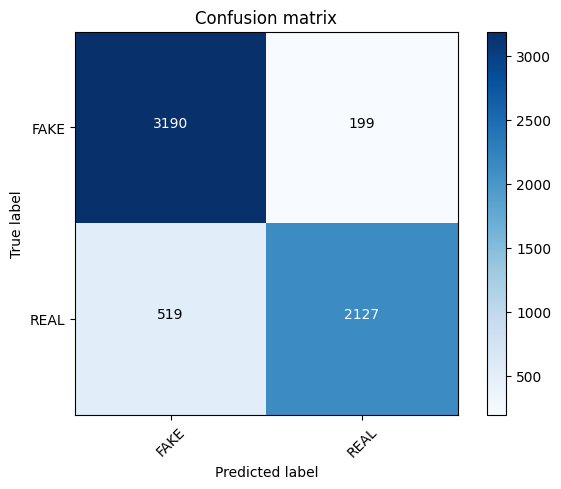

In [31]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [32]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8810273405136703

In [33]:
y_train.shape

(12250,)

## Passive Aggressive Classifier Algorithm

In [34]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.917
Confusion matrix, without normalization


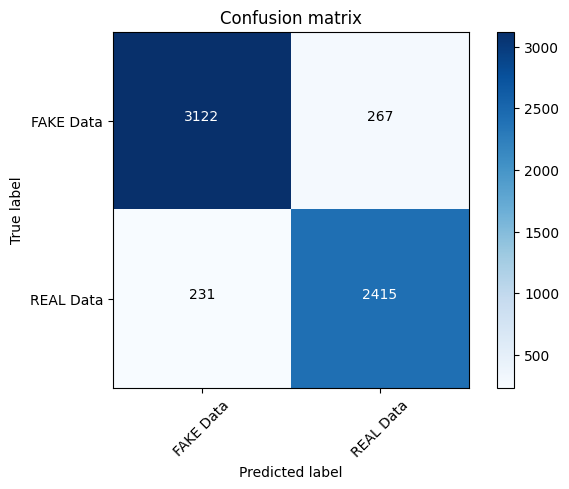

In [35]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

## Multinomial Classifier with Hyperparameter

In [36]:
classifier=MultinomialNB(alpha=0.1)

In [37]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

c:\Users\hp\anaconda3\envs\ds\lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
c:\Users\hp\anaconda3\envs\ds\lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score : 0.8662800331400166
Alpha: 0.1, Score : 0.8777133388566695
Alpha: 0.2, Score : 0.8801988400994201
Alpha: 0.30000000000000004, Score : 0.87986743993372
Alpha: 0.4, Score : 0.8808616404308203
Alpha: 0.5, Score : 0.8806959403479702
Alpha: 0.6000000000000001, Score : 0.8815244407622204
Alpha: 0.7000000000000001, Score : 0.8813587406793704
Alpha: 0.8, Score : 0.8816901408450705
Alpha: 0.9, Score : 0.8816901408450705


In [38]:
## Get Features names
feature_names = tfidf.get_feature_names_out()

In [39]:
classifier.feature_log_prob_[0]

array([ -8.59813984,  -8.64311917,  -9.67080665, ...,  -9.40176836,
       -10.25997178,  -8.97209716])

In [40]:
### Most real
sorted(zip(classifier.feature_log_prob_[0], feature_names), reverse=True)[:20]

[(-3.9497603498825393, 'new'),
 (-3.9689481006947727, 'york'),
 (-3.969032969681349, 'new york'),
 (-3.9728936199761264, 'time'),
 (-3.979866660651135, 'york time'),
 (-3.979866660651135, 'new york time'),
 (-4.6215808113530885, 'breitbart'),
 (-4.797902430598906, 'trump'),
 (-5.666344542746281, 'donald'),
 (-5.669113589614728, 'donald trump'),
 (-6.0459788417963765, 'say'),
 (-6.244307613966833, 'obama'),
 (-6.323461418144095, 'presid'),
 (-6.352839646565577, 'state'),
 (-6.356125020747031, 'attack'),
 (-6.388987201018693, 'report'),
 (-6.448929663358422, 'hous'),
 (-6.45906496727267, 'clinton'),
 (-6.5372098092978606, 'brief'),
 (-6.577300430009248, 'kill')]

In [41]:
### Most fake
sorted(zip(classifier.feature_log_prob_[0], feature_names))[:5000]

[(-10.259971779167145, 'access pipelin protest'),
 (-10.259971779167145, 'acknowledg emf'),
 (-10.259971779167145, 'acknowledg emf damag'),
 (-10.259971779167145, 'acquit'),
 (-10.259971779167145, 'acr'),
 (-10.259971779167145, 'adhd'),
 (-10.259971779167145, 'airstrik kill'),
 (-10.259971779167145, 'al nusra'),
 (-10.259971779167145, 'america last'),
 (-10.259971779167145, 'america vote'),
 (-10.259971779167145, 'american concern'),
 (-10.259971779167145, 'american concern elect'),
 (-10.259971779167145, 'american peopl defeat'),
 (-10.259971779167145, 'aqsa'),
 (-10.259971779167145, 'arabian'),
 (-10.259971779167145, 'ariel noyola'),
 (-10.259971779167145, 'ariel noyola rodr'),
 (-10.259971779167145, 'ask question'),
 (-10.259971779167145, 'auf'),
 (-10.259971779167145, 'avail'),
 (-10.259971779167145, 'babi powder'),
 (-10.259971779167145, 'bad news'),
 (-10.259971779167145, 'badg'),
 (-10.259971779167145, 'ballot'),
 (-10.259971779167145, 'baltic'),
 (-10.259971779167145, 'banana')

## HashingVectorizer

In [50]:
hs_vectorizer=HashingVectorizer(n_features=5000, alternate_sign=False)
X=hs_vectorizer.fit_transform(corpus).toarray()

In [51]:
X.shape

(18285, 5000)

In [52]:
X

array([[0.        , 0.31622777, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [53]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

accuracy:   0.871
Confusion matrix, without normalization


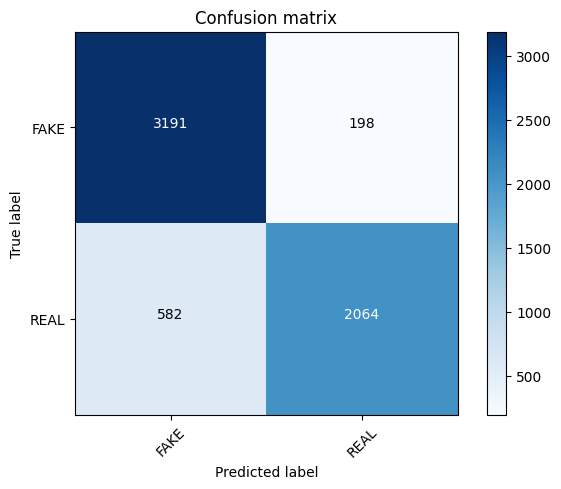

In [54]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])